# Content

## 01 Importing libraries

## 02 Importing datasets

## 03 Creating profiling variable based on age, income, goods in department_id column and number of dependants

## 04 Visualizations showing distribution of profiles

## 05 Aggregated max, mean, min variables on a customer-profile level

## 06 Comparing customer profiles with regions and departments

## 07 Exporting dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path

path = r'C:\Users\ketki\OneDrive\Desktop\Data Analytics bootcamp tasks\Data Immersion\Achievement 4 Python\Instacart Basket Analysis'

In [3]:
# Importing customers_merged

df_ords_prods_merged_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'customer_merged.pkl'))

In [5]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'high_activity_customers.pkl'))

In [6]:
crosstab = df_merged.head(5)

In [7]:
crosstab.to_clipboard()

For income profile

In [8]:
df_merged.loc[df_merged['income'] <= 50000, 'income_loc'] = 'Low Income'

In [9]:
df_merged.loc[(df_merged['income'] > 50000) & (df_merged['income'] < 150000), 'income_loc'] = 'Average Income'

In [10]:
df_merged.loc[df_merged['income'] >150000, 'income_loc'] = 'High Income'

In [11]:
df_merged['income_loc'].value_counts(dropna = False)

Average Income    23120016
High Income        3801883
Low Income         3248834
NaN                    691
Name: income_loc, dtype: int64

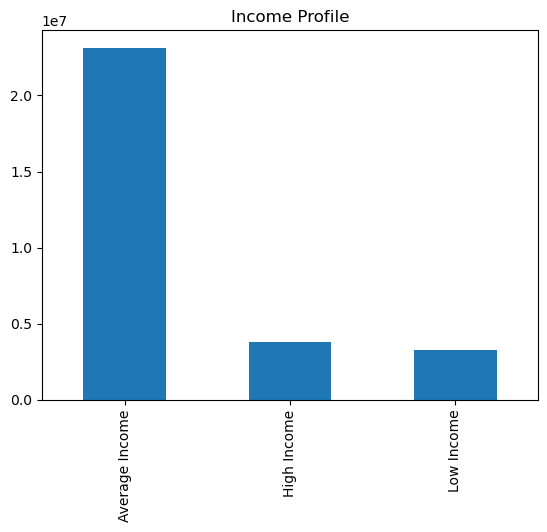

In [12]:
income_profile_bar_chart = df_merged['income_loc'].value_counts().plot.bar(title = 'Income Profile')

In [13]:
income_profile_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar_chart'))

In [14]:
# Aggregating mean, min and max variables on customer income profile for usage frequency and expenditure


income_aggregated = df_merged.groupby('income_loc').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [15]:
income_aggregated

days_since_prior_order                prices              
                                 mean  min   max       mean  min      max
income_loc                                                               
Average Income              10.608719  0.0  30.0   9.230074  1.0  99999.0
High Income                 10.521140  0.0  30.0  32.237740  1.0  99999.0
Low Income                  10.943486  0.0  30.0   6.711410  1.0     25.0

In [16]:
crosstab_Region_income_loc = pd.crosstab(df_merged['Region'], df_merged['income_loc'], dropna = False)

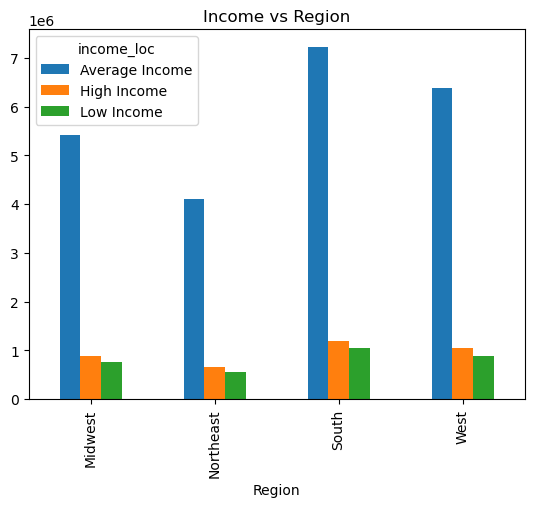

In [17]:
bar_income_region = crosstab_Region_income_loc.plot.bar(title = 'Income vs Region')

Comparing customer income profile with departments

In [18]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region'))

In [19]:
crosstab_department_income_loc = pd.crosstab(df_merged['department_id'], df_merged['income_loc'], dropna = False)

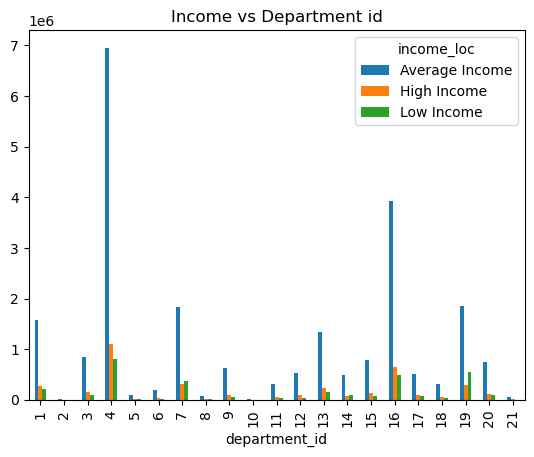

In [20]:
bar_income_department = crosstab_department_income_loc.plot.bar(title = 'Income vs Department id')

In [21]:
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department'))

Profiling Based on number of dependants

In [22]:
df_merged.loc[df_merged['n_dependants'] == 0, 'n_dependants_loc'] = 'Single Adult'

In [23]:
df_merged.loc[df_merged['n_dependants'] != 0, 'n_dependants_loc'] = 'Person with Family'

In [24]:
df_merged['n_dependants_loc'].value_counts(dropna = False)

Person with Family    22632211
Single Adult           7539213
Name: n_dependants_loc, dtype: int64

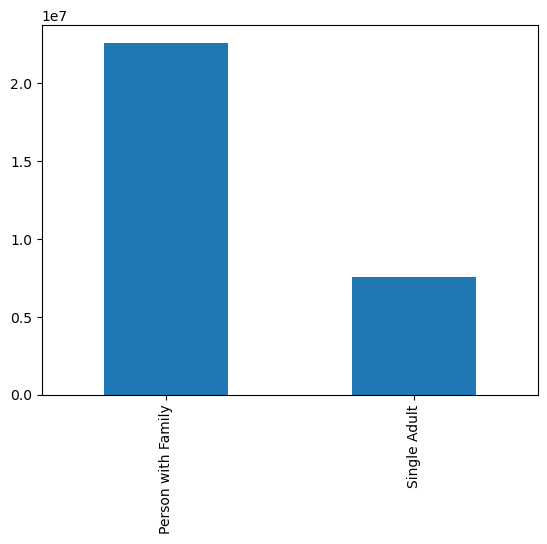

In [25]:
# Creating a bar chart for n_dependants

number_of_dependants_bar_chart = df_merged['n_dependants_loc'].value_counts().plot.bar()

In [26]:
number_of_dependants_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'number_of_dependants_bar_chart'))

In [27]:
# Aggregating mean, min and max variables on customer number of dependants profile for usage frequency and expenditure

n_dependants_aggregated = df_merged.groupby('n_dependants_loc').agg({'days_since_prior_order':['mean','min','max'], 'prices':['mean','min','max']})

In [28]:
n_dependants_aggregated

days_since_prior_order                prices              
                                     mean  min   max       mean  min      max
n_dependants_loc                                                             
Person with Family              10.641405  0.0  30.0  11.783410  1.0  99999.0
Single Adult                    10.610151  0.0  30.0  12.081944  1.0  99999.0

In [33]:
# Visualization for crosstab between n_dependants and region

crosstab_Region_n_dependants = pd.crosstab(df_merged['Region'], df_merged['n_dependants_loc'], dropna = False)

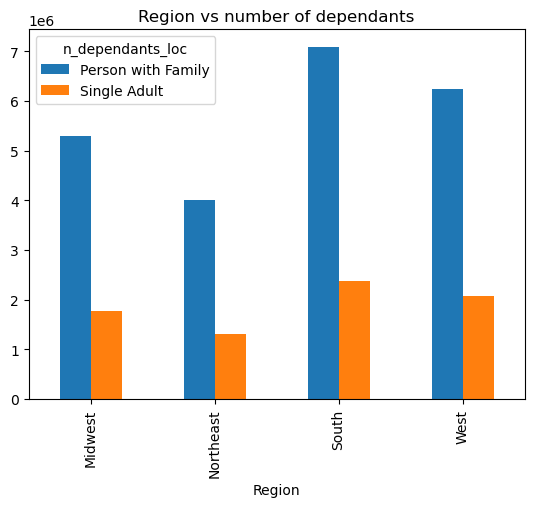

In [36]:
bar_n_dependants_region = crosstab_Region_n_dependants.plot.bar(title = 'Region vs number of dependants' )

In [37]:
bar_n_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_n_dependants_region'))

In [38]:
# Visualization for crosstab between n_dependants and department

crosstab_department_id_n_dependants = pd.crosstab(df_merged['department_id'],df_merged['n_dependants_loc'], dropna = False)

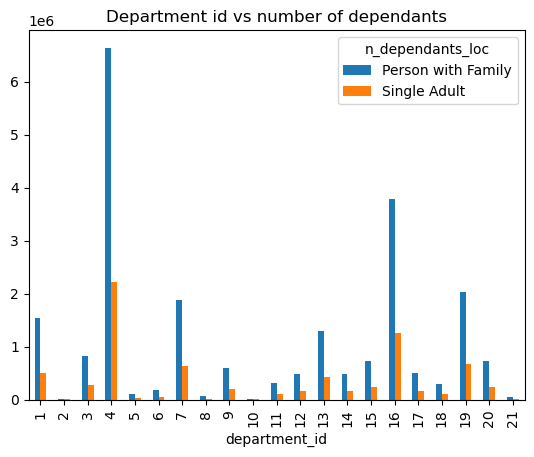

In [39]:
bar_n_dependants_department_id = crosstab_department_id_n_dependants.plot.bar(title = 'Department id vs number of dependants')

In [40]:
bar_n_dependants_department_id.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_n_dependants_department_id'))

In [41]:
# Profiling based on age

df_merged.loc[df_merged['Age'] <= 40, 'Age_loc'] = 'Adult'

In [42]:
df_merged.loc[(df_merged['Age'] > 40) & (df_merged['Age'] <= 60), 'Age_loc'] = 'Middle Aged'

In [43]:
df_merged.loc[df_merged['Age'] > 60, 'Age_loc'] = 'Senior'

In [44]:
df_merged.head(5)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,Age,date_joined,n_dependants,fam_status,income,Region,customer_activity,income_loc,n_dependants_loc,Age_loc
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,31,2/17/2019,3,married,40423,South,High Activity Customers,Low Income,Person with Family,Adult
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,31,2/17/2019,3,married,40423,South,High Activity Customers,Low Income,Person with Family,Adult
2,2,473747,1,prior,3,3,12,21.0,196,1,...,31,2/17/2019,3,married,40423,South,High Activity Customers,Low Income,Person with Family,Adult
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,31,2/17/2019,3,married,40423,South,High Activity Customers,Low Income,Person with Family,Adult
4,4,431534,1,prior,5,4,15,28.0,196,1,...,31,2/17/2019,3,married,40423,South,High Activity Customers,Low Income,Person with Family,Adult


In [45]:
df_merged['Age_loc'].value_counts()

Adult          10863364
Senior          9855503
Middle Aged     9452557
Name: Age_loc, dtype: int64

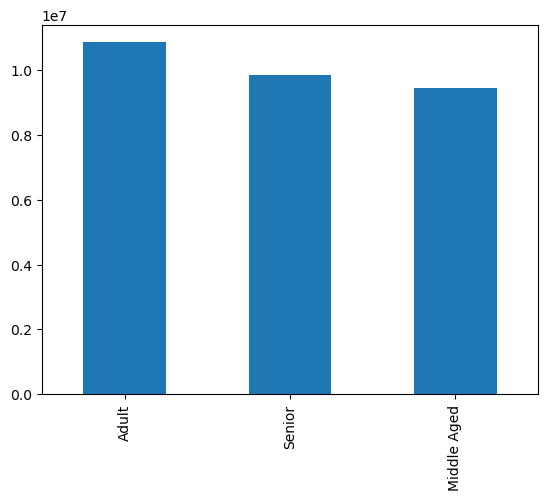

In [46]:
bar_age = df_merged['Age_loc'].value_counts().plot.bar()

In [47]:
# Aggregating mean, min and max variables on customer age profile for usage frequency and expenditure

Age_aggregated = df_merged.groupby('Age_loc').agg({'days_since_prior_order':['mean','min','max'], 'prices':['mean','min','max']})

In [48]:
Age_aggregated

days_since_prior_order                prices              
                              mean  min   max       mean  min      max
Age_loc                                                               
Adult                    10.635652  0.0  30.0  11.979778  1.0  99999.0
Middle Aged              10.647249  0.0  30.0  11.841801  1.0  99999.0
Senior                   10.618229  0.0  30.0  11.739327  1.0  99999.0

In [49]:
# Visualization for crosstab between Age and region

crosstab_Region_Age = pd.crosstab(df_merged['Region'], df_merged['Age_loc'], dropna = False)

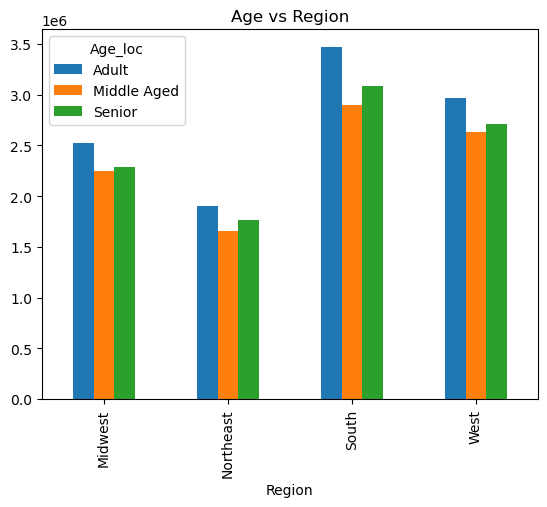

In [50]:
bar_Age_region = crosstab_Region_Age.plot.bar(title = 'Age vs Region')

In [51]:
# Visualization for crosstab between Age and department

crosstab_department_Age = pd.crosstab(df_merged['department_id'],df_merged['Age_loc'], dropna = False)

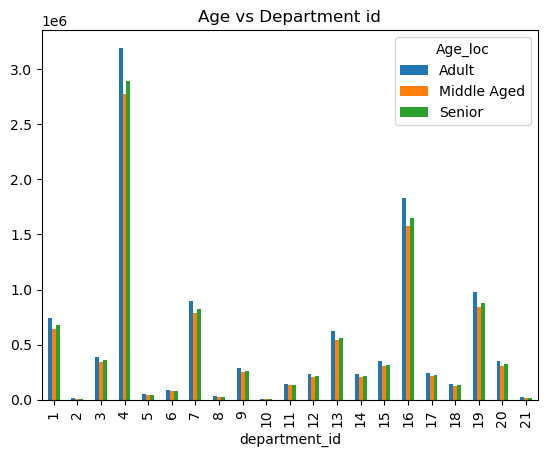

In [52]:
bar_Age_department_id = crosstab_department_Age.plot.bar(title = 'Age vs Department id')

In [53]:
# Import departments_wrangled.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [54]:
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [55]:
df_merged_new = df_merged.merge(df_dep, on = 'department_id')

In [56]:
crosstab_age_departments = pd.crosstab(df_merged_new['department'], df_merged['Age_loc'], dropna = False)

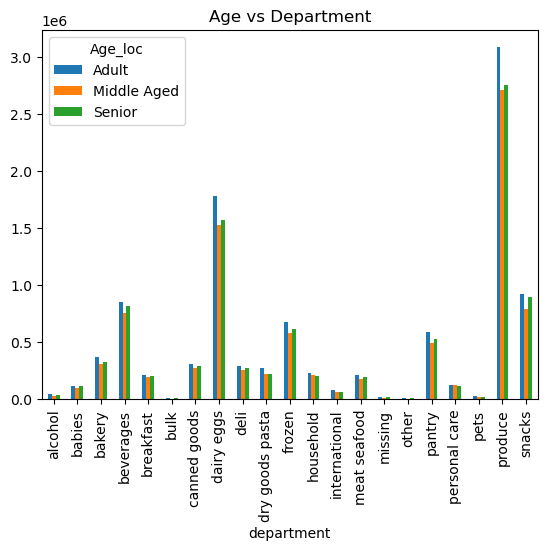

In [60]:
bar_Age_departments = crosstab_age_departments.plot.bar(title = 'Age vs Department')

In [61]:
bar_Age_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Age_departments'))

In [62]:
# Visualization for crosstab between n_dependants and department

crosstab_departments_n_dependants = pd.crosstab(df_merged_new['department'],df_merged['n_dependants_loc'], dropna = False)

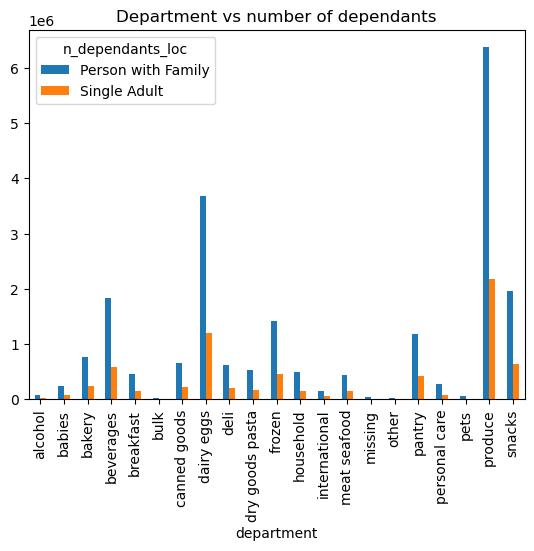

In [63]:
bar_n_dependants_departments = crosstab_departments_n_dependants.plot.bar(title = 'Department vs number of dependants')

In [64]:
bar_n_dependants_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_n_dependants_departments'))

In [65]:
# Visualization for crosstab between income and department

crosstab_departments_income_loc = pd.crosstab(df_merged_new['department'], df_merged['income_loc'], dropna = False)

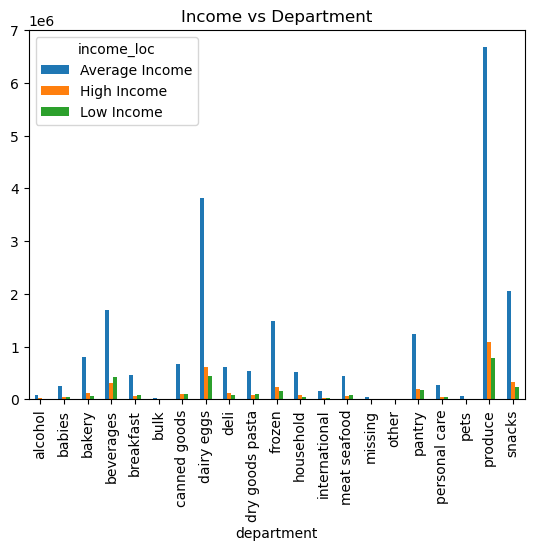

In [66]:
bar_income_departments = crosstab_departments_income_loc.plot.bar(title = 'Income vs Department')

In [67]:
bar_income_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_departments'))

In [68]:
df_merged_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_new.pkl'))

In [69]:
crosstab_departments_Region = pd.crosstab(df_merged_new['department'], df_merged['Region'], dropna = False)

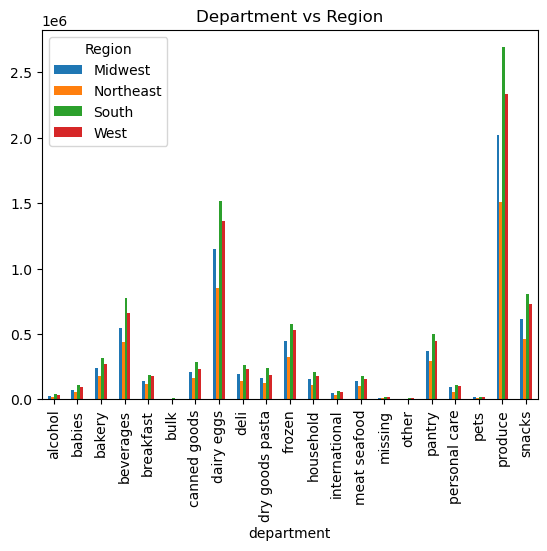

In [70]:
bar_Region_departments = crosstab_departments_Region.plot.bar(title = 'Department vs Region')